## Observations and Insights 

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_merge = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')

# Display the data table for preview
study_merge = pd.DataFrame(study_merge)
study_merge = study_merge.sort_values(['Mouse ID','Timepoint'], ascending = True)
study_animals = study_merge.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep='first') 
study_animals.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1


In [72]:
# Checking the number of mice.
mouse_count = study_merge['Mouse ID'].nunique()
mouserow_count = study_merge['Mouse ID'].count()
print(f'There are {mouse_count} mice and {mouserow_count} mouse rows in this study.')

There are 249 mice and 1893 mouse rows in this study.


In [73]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Mouse_Timepoint = study_merge[['Mouse ID','Timepoint']]
duplicated_mice = Mouse_Timepoint.duplicated(['Mouse ID','Timepoint'])
duplicated = Mouse_Timepoint[duplicated_mice]
duplicated = pd.DataFrame(duplicated)
duplicated

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [74]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice = study_merge.duplicated(['Mouse ID','Timepoint'])
duplicated = study_merge[duplicated_mice]
duplicated = pd.DataFrame(duplicated)
duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [75]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_animals = study_merge.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep='first') 

In [76]:
# Checking the number of mice in the clean DataFrame.
mice_count = study_animals['Mouse ID'].nunique()
mouserow_count = study_animals['Mouse ID'].count()
print(f'There are {mouse_count} mice and {mouserow_count} mouse rows in this study.')

There are 249 mice and 1888 mouse rows in this study.


## Summary Statistics

In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_group = study_animals.groupby(['Drug Regimen', 'Timepoint'])
tvolume_mean = round(mouse_group['Tumor Volume (mm3)'].mean(), 1)
tvolume_median = round(mouse_group['Tumor Volume (mm3)'].median(), 1)
tvolume_var = round(mouse_group['Tumor Volume (mm3)'].var(), 1)
tvolume_SD = round(mouse_group['Tumor Volume (mm3)'].std(), 1)
tvolume_SEM = round(mouse_group['Tumor Volume (mm3)'].sem(), 1)

tvolume_stats = {'Mean': tvolume_mean,
                'Median': tvolume_median,
                'Variance': tvolume_var,
                'St. Dev': tvolume_SD,
                'SEM': tvolume_SEM}
tvolume_stats = pd.DataFrame(tvolume_stats)
tvolume_stats.head()

Mean  Median  Variance  St. Dev  SEM
Drug Regimen Timepoint                                      
Capomulin    0          45.0    45.0       0.0      0.0  0.0
             5          44.3    45.6       5.0      2.2  0.4
             10         43.1    43.4      12.3      3.5  0.7
             15         42.1    42.8      16.9      4.1  0.8
             20         40.7    40.7      19.0      4.4  0.9

In [88]:
# Generate an aggregated summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tvolume_agg_stats = mouse_group['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem']).round(1)
tvolume_agg_stats.head()

mean  median   var  std  sem
Drug Regimen Timepoint                              
Capomulin    0          45.0    45.0   0.0  0.0  0.0
             5          44.3    45.6   5.0  2.2  0.4
             10         43.1    43.4  12.3  3.5  0.7
             15         42.1    42.8  16.9  4.1  0.8
             20         40.7    40.7  19.0  4.4  0.9
...                      ...     ...   ...  ...  ...
Zoniferol    25         55.4    55.7   5.8  2.4  0.6
             30         57.7    57.4   9.6  3.1  0.8
             35         60.1    60.4  10.9  3.3  0.9
             40         62.9    62.3  14.0  3.7  1.0
             45         66.0    65.7  14.1  3.8  1.0

[100 rows x 5 columns]

## Bar and Pie Charts

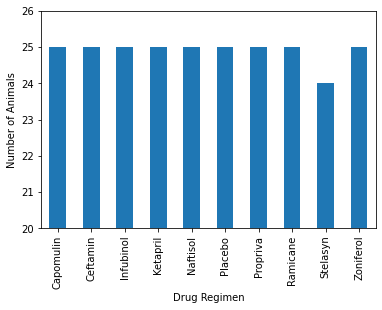

In [111]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouse_group = study_animals[['Mouse ID', 'Drug Regimen']].groupby('Drug Regimen')
mice_count = mouse_group['Mouse ID'].nunique()
drug_list = mouse_group['Drug Regimen']
mice_count.plot(kind='bar')

plt.ylim(20,26)
plt.ylabel("Number of Animals")

TypeError: unhashable type: 'numpy.ndarray'

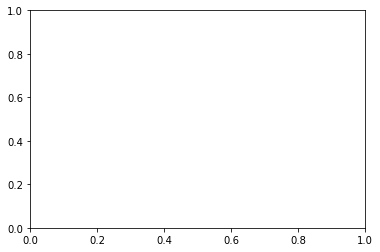

In [110]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(drug_list,mice_count)

plt.ylim(20,26)
plt.ylabel("Number of Animals")

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
